### Mini Project --- Earthquake

# Clustering data
Dataset from Kaggle : **"Earthquake Damage Prediction"**  
Source: https://www.drivendata.org/competitions/57/nepal-earthquake/data/ (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
raw_data = pd.read_csv('train_values.csv')
##setting building_id as the index for easy referencing
raw_data = raw_data.set_index('building_id')
raw_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


#### Reading up the data types so we are able to sort it out in terms of categorial, numerical data

In [3]:
raw_data.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#### Checking for the number of values to ensure that there is no missing data

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

#### Damage_score calculations

In [5]:
variables_dropped = ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id', 'legal_ownership_status',
                    'count_families', 'has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']
score_calculation = pd.DataFrame(raw_data.drop(variables_dropped, axis=1))
## Converting remaining data as a category type data
#score_calculation = score_calculation.astype('category')
score_calculation.head()


,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2,30,6,5,t,r,n,f,q,t,...,1,0,0,0,0,0,0,0,0,0
28830,2,10,8,7,o,r,n,x,q,s,...,1,0,0,0,0,0,0,0,0,0
94947,2,10,5,5,t,r,n,f,x,t,...,1,0,0,0,0,0,0,0,0,0
590882,2,10,6,5,t,r,n,f,x,s,...,1,0,0,0,0,1,1,0,0,0
201944,3,30,8,9,t,r,n,f,x,s,...,0,0,0,0,0,0,0,0,0,0


### Converting the cateogrical into a rubricks, trying out for the variavle age

Ratioanle of this scoring system:
1. Assuming an equal earthquake throughout, a younger building , lower ```age``` will actually have a lower chance of it collapse, so the score it will get
2. Score a higher score system will mean it will have complete destruction given the fact that there is weaker
3. Summary: Lower Score ==  Stronger, higher score ==  Weaker

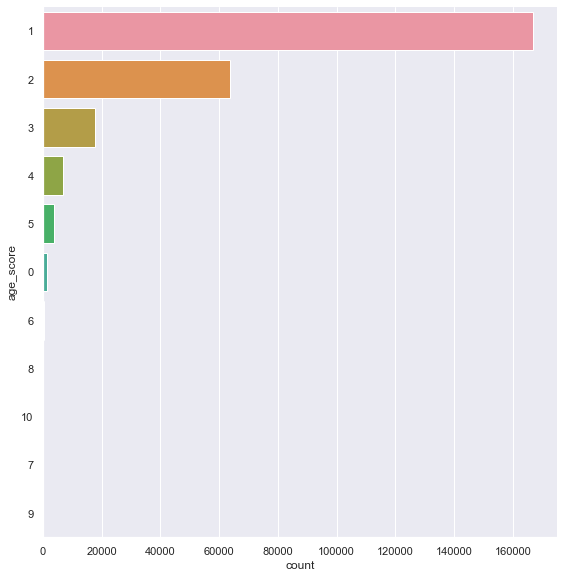

In [7]:
## Setting up of conditions for sorting, 10 grading system
conditions = [(score_calculation['age'] <= 20),
              (score_calculation['age'] <= 40) & (score_calculation['age'] > 20),
              (score_calculation['age'] <= 60) & (score_calculation['age'] > 40),
              (score_calculation['age'] <= 80) & (score_calculation['age'] > 60),
              (score_calculation['age'] <= 100) & (score_calculation['age'] > 80),
              (score_calculation['age'] <= 120) & (score_calculation['age'] > 100),
              (score_calculation['age'] <= 140) & (score_calculation['age'] > 120),
              (score_calculation['age'] <= 160) & (score_calculation['age'] > 140),
              (score_calculation['age'] <= 180) & (score_calculation['age'] > 160),
              (score_calculation['age'] <= 200) & (score_calculation['age'] > 180)]
age_score = [1,2,3,4,5,6,7,8,9,10]
score_calculation['age_score'] = np.select(conditions,age_score)
score_calculation.head(50)
sb.catplot(y = "age_score", data = score_calculation, kind = "count", 
        order = score_calculation['age_score'].value_counts().index, height = 8)